In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import io
import cv2
import copy
import os
from tqdm import tqdm
import torch.nn as nn
import torch
import torchvision
from torch.utils.data import Dataset
from torch import default_generator, randperm
from torch._utils import _accumulate
from torch.utils.data.dataset import Subset
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
batch_size = 16
momentum=0.9
lr = 1e-3
import random
sub_sample = 0.5
import matplotlib
import gc
matplotlib.use('Agg')

cuda:0


In [3]:
def sig2pic(path_to_data, filename, figsize=(16,8), dpi=80):
    try:
        with open(path_to_data + filename, 'rb') as file:
            tmp = np.frombuffer(file.read(), dtype=np.complex64)
        signal = tmp
        fig1 = plt.figure(figsize = figsize)
        plt.axes(ylim=(-1, 1))
        sigr = signal.real
        sigi = signal.imag
        
        plt.plot(sigr, color='black')
        plt.gca().set_axis_off()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
        plt.margins(0,0)
        buf1 = io.BytesIO()
        fig1.savefig(buf1, format="png", dpi=dpi)
        buf1.seek(0)
        img_arr1 = np.frombuffer(buf1.getvalue(), dtype=np.uint8)
        buf1.close()
        img1 = cv2.imdecode(img_arr1, 1)
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        plt.close()

        fig2 = plt.figure(figsize = figsize)
        plt.axes(ylim=(-1, 1))
        sigr = signal.real
        sigi = signal.imag
        
        plt.plot(sigi, color='black')
        plt.gca().set_axis_off()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
        plt.margins(0,0)
        buf = io.BytesIO()
        fig2.savefig(buf, format="png", dpi=dpi)
        buf.seek(0)
        img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
        buf.close()
        img = cv2.imdecode(img_arr, 1)
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.close()
        img = np.array([img1, img2])
        return img
    except Exception as e:
        print(str(e))
        return None

In [4]:
path_to_binaries = 'S:/drone_dataset_v4.0/'
path_to_pictures = 'S:/drone_dataset_v4.0_pictures/'

In [5]:
bin_subdirs = os.listdir(path_to_binaries)

In [8]:
from tqdm import tqdm

In [11]:
for subdir in bin_subdirs:
    filepath = path_to_binaries + subdir + '/'
    if not os.path.exists(path_to_pictures + subdir):
        os.mkdir(path_to_pictures + subdir)
    files = os.listdir(filepath)
    for file in tqdm(files):
        savepath = path_to_pictures + subdir + '/' + file + '.npy'
        if not os.path.exists(savepath):
            img = sig2pic(path_to_data=filepath, filename=file)
            np.save(savepath, img)
            #print('File: ', file, ', shape: ', img.shape , ' saved to ', savepath)
            gc.collect()
        else:
            print('file ',  file, ' already exists!')
    print('Dir: ', subdir , ' finished!')

100%|█████████████████████████████████████████████████████████████████████████████| 237/237 [00:00<00:00, 18213.72it/s]


file  A5_2.405_noise_0  already exists!
file  A5_2.405_noise_1  already exists!
file  A5_2.405_noise_10  already exists!
file  A5_2.405_noise_100  already exists!
file  A5_2.405_noise_101  already exists!
file  A5_2.405_noise_102  already exists!
file  A5_2.405_noise_103  already exists!
file  A5_2.405_noise_104  already exists!
file  A5_2.405_noise_105  already exists!
file  A5_2.405_noise_106  already exists!
file  A5_2.405_noise_107  already exists!
file  A5_2.405_noise_108  already exists!
file  A5_2.405_noise_109  already exists!
file  A5_2.405_noise_11  already exists!
file  A5_2.405_noise_110  already exists!
file  A5_2.405_noise_111  already exists!
file  A5_2.405_noise_112  already exists!
file  A5_2.405_noise_113  already exists!
file  A5_2.405_noise_114  already exists!
file  A5_2.405_noise_115  already exists!
file  A5_2.405_noise_116  already exists!
file  A5_2.405_noise_117  already exists!
file  A5_2.405_noise_118  already exists!
file  A5_2.405_noise_119  already exists

100%|█████████████████████████████████████████████████████████████████████████████| 222/222 [00:00<00:00, 18483.71it/s]


file  A5_2.415_noise_0  already exists!
file  A5_2.415_noise_1  already exists!
file  A5_2.415_noise_10  already exists!
file  A5_2.415_noise_100  already exists!
file  A5_2.415_noise_101  already exists!
file  A5_2.415_noise_102  already exists!
file  A5_2.415_noise_103  already exists!
file  A5_2.415_noise_104  already exists!
file  A5_2.415_noise_105  already exists!
file  A5_2.415_noise_106  already exists!
file  A5_2.415_noise_107  already exists!
file  A5_2.415_noise_108  already exists!
file  A5_2.415_noise_109  already exists!
file  A5_2.415_noise_11  already exists!
file  A5_2.415_noise_110  already exists!
file  A5_2.415_noise_111  already exists!
file  A5_2.415_noise_112  already exists!
file  A5_2.415_noise_113  already exists!
file  A5_2.415_noise_114  already exists!
file  A5_2.415_noise_115  already exists!
file  A5_2.415_noise_116  already exists!
file  A5_2.415_noise_117  already exists!
file  A5_2.415_noise_118  already exists!
file  A5_2.415_noise_119  already exists

100%|█████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 17804.56it/s]


file  A5_2.41_noise_0  already exists!
file  A5_2.41_noise_1  already exists!
file  A5_2.41_noise_10  already exists!
file  A5_2.41_noise_100  already exists!
file  A5_2.41_noise_101  already exists!
file  A5_2.41_noise_102  already exists!
file  A5_2.41_noise_103  already exists!
file  A5_2.41_noise_104  already exists!
file  A5_2.41_noise_105  already exists!
file  A5_2.41_noise_106  already exists!
file  A5_2.41_noise_107  already exists!
file  A5_2.41_noise_108  already exists!
file  A5_2.41_noise_109  already exists!
file  A5_2.41_noise_11  already exists!
file  A5_2.41_noise_110  already exists!
file  A5_2.41_noise_111  already exists!
file  A5_2.41_noise_112  already exists!
file  A5_2.41_noise_113  already exists!
file  A5_2.41_noise_114  already exists!
file  A5_2.41_noise_115  already exists!
file  A5_2.41_noise_116  already exists!
file  A5_2.41_noise_117  already exists!
file  A5_2.41_noise_118  already exists!
file  A5_2.41_noise_119  already exists!
file  A5_2.41_noise_12

100%|█████████████████████████████████████████████████████████████████████████████| 248/248 [00:00<00:00, 19058.03it/s]


file  A5_2.425_noise_0  already exists!
file  A5_2.425_noise_1  already exists!
file  A5_2.425_noise_10  already exists!
file  A5_2.425_noise_100  already exists!
file  A5_2.425_noise_101  already exists!
file  A5_2.425_noise_102  already exists!
file  A5_2.425_noise_103  already exists!
file  A5_2.425_noise_104  already exists!
file  A5_2.425_noise_105  already exists!
file  A5_2.425_noise_106  already exists!
file  A5_2.425_noise_107  already exists!
file  A5_2.425_noise_108  already exists!
file  A5_2.425_noise_109  already exists!
file  A5_2.425_noise_11  already exists!
file  A5_2.425_noise_110  already exists!
file  A5_2.425_noise_111  already exists!
file  A5_2.425_noise_112  already exists!
file  A5_2.425_noise_113  already exists!
file  A5_2.425_noise_114  already exists!
file  A5_2.425_noise_115  already exists!
file  A5_2.425_noise_116  already exists!
file  A5_2.425_noise_117  already exists!
file  A5_2.425_noise_118  already exists!
file  A5_2.425_noise_119  already exists

100%|█████████████████████████████████████████████████████████████████████████████| 265/265 [00:00<00:00, 20367.41it/s]


file  A5_2.42_noise_0  already exists!
file  A5_2.42_noise_1  already exists!
file  A5_2.42_noise_10  already exists!
file  A5_2.42_noise_100  already exists!
file  A5_2.42_noise_101  already exists!
file  A5_2.42_noise_102  already exists!
file  A5_2.42_noise_103  already exists!
file  A5_2.42_noise_104  already exists!
file  A5_2.42_noise_105  already exists!
file  A5_2.42_noise_106  already exists!
file  A5_2.42_noise_107  already exists!
file  A5_2.42_noise_108  already exists!
file  A5_2.42_noise_109  already exists!
file  A5_2.42_noise_11  already exists!
file  A5_2.42_noise_110  already exists!
file  A5_2.42_noise_111  already exists!
file  A5_2.42_noise_112  already exists!
file  A5_2.42_noise_113  already exists!
file  A5_2.42_noise_114  already exists!
file  A5_2.42_noise_115  already exists!
file  A5_2.42_noise_116  already exists!
file  A5_2.42_noise_117  already exists!
file  A5_2.42_noise_118  already exists!
file  A5_2.42_noise_119  already exists!
file  A5_2.42_noise_12

100%|█████████████████████████████████████████████████████████████████████████████| 287/287 [00:00<00:00, 20482.30it/s]


file  A5_2.435_noise_0  already exists!
file  A5_2.435_noise_1  already exists!
file  A5_2.435_noise_10  already exists!
file  A5_2.435_noise_100  already exists!
file  A5_2.435_noise_101  already exists!
file  A5_2.435_noise_102  already exists!
file  A5_2.435_noise_103  already exists!
file  A5_2.435_noise_104  already exists!
file  A5_2.435_noise_105  already exists!
file  A5_2.435_noise_106  already exists!
file  A5_2.435_noise_107  already exists!
file  A5_2.435_noise_108  already exists!
file  A5_2.435_noise_109  already exists!
file  A5_2.435_noise_11  already exists!
file  A5_2.435_noise_110  already exists!
file  A5_2.435_noise_111  already exists!
file  A5_2.435_noise_112  already exists!
file  A5_2.435_noise_113  already exists!
file  A5_2.435_noise_114  already exists!
file  A5_2.435_noise_115  already exists!
file  A5_2.435_noise_116  already exists!
file  A5_2.435_noise_117  already exists!
file  A5_2.435_noise_118  already exists!
file  A5_2.435_noise_119  already exists

100%|█████████████████████████████████████████████████████████████████████████████| 302/302 [00:00<00:00, 20104.75it/s]


file  A5_2.43_noise_0  already exists!
file  A5_2.43_noise_1  already exists!
file  A5_2.43_noise_10  already exists!
file  A5_2.43_noise_100  already exists!
file  A5_2.43_noise_101  already exists!
file  A5_2.43_noise_102  already exists!
file  A5_2.43_noise_103  already exists!
file  A5_2.43_noise_104  already exists!
file  A5_2.43_noise_105  already exists!
file  A5_2.43_noise_106  already exists!
file  A5_2.43_noise_107  already exists!
file  A5_2.43_noise_108  already exists!
file  A5_2.43_noise_109  already exists!
file  A5_2.43_noise_11  already exists!
file  A5_2.43_noise_110  already exists!
file  A5_2.43_noise_111  already exists!
file  A5_2.43_noise_112  already exists!
file  A5_2.43_noise_113  already exists!
file  A5_2.43_noise_114  already exists!
file  A5_2.43_noise_115  already exists!
file  A5_2.43_noise_116  already exists!
file  A5_2.43_noise_117  already exists!
file  A5_2.43_noise_118  already exists!
file  A5_2.43_noise_119  already exists!
file  A5_2.43_noise_12

100%|█████████████████████████████████████████████████████████████████████████████| 211/211 [00:00<00:00, 19167.84it/s]


file  A5_2.44_noise_0  already exists!
file  A5_2.44_noise_1  already exists!
file  A5_2.44_noise_10  already exists!
file  A5_2.44_noise_100  already exists!
file  A5_2.44_noise_101  already exists!
file  A5_2.44_noise_102  already exists!
file  A5_2.44_noise_103  already exists!
file  A5_2.44_noise_104  already exists!
file  A5_2.44_noise_105  already exists!
file  A5_2.44_noise_106  already exists!
file  A5_2.44_noise_107  already exists!
file  A5_2.44_noise_108  already exists!
file  A5_2.44_noise_109  already exists!
file  A5_2.44_noise_11  already exists!
file  A5_2.44_noise_110  already exists!
file  A5_2.44_noise_111  already exists!
file  A5_2.44_noise_112  already exists!
file  A5_2.44_noise_113  already exists!
file  A5_2.44_noise_114  already exists!
file  A5_2.44_noise_115  already exists!
file  A5_2.44_noise_116  already exists!
file  A5_2.44_noise_117  already exists!
file  A5_2.44_noise_118  already exists!
file  A5_2.44_noise_119  already exists!
file  A5_2.44_noise_12

100%|█████████████████████████████████████████████████████████████████████████████| 244/244 [00:00<00:00, 18752.02it/s]


file  A5_2.45_noise_0  already exists!
file  A5_2.45_noise_1  already exists!
file  A5_2.45_noise_10  already exists!
file  A5_2.45_noise_100  already exists!
file  A5_2.45_noise_101  already exists!
file  A5_2.45_noise_102  already exists!
file  A5_2.45_noise_103  already exists!
file  A5_2.45_noise_104  already exists!
file  A5_2.45_noise_105  already exists!
file  A5_2.45_noise_106  already exists!
file  A5_2.45_noise_107  already exists!
file  A5_2.45_noise_108  already exists!
file  A5_2.45_noise_109  already exists!
file  A5_2.45_noise_11  already exists!
file  A5_2.45_noise_110  already exists!
file  A5_2.45_noise_111  already exists!
file  A5_2.45_noise_112  already exists!
file  A5_2.45_noise_113  already exists!
file  A5_2.45_noise_114  already exists!
file  A5_2.45_noise_115  already exists!
file  A5_2.45_noise_116  already exists!
file  A5_2.45_noise_117  already exists!
file  A5_2.45_noise_118  already exists!
file  A5_2.45_noise_119  already exists!
file  A5_2.45_noise_12

100%|█████████████████████████████████████████████████████████████████████████████| 397/397 [00:00<00:00, 19831.34it/s]


file  A5_2.4_noise_0  already exists!
file  A5_2.4_noise_1  already exists!
file  A5_2.4_noise_10  already exists!
file  A5_2.4_noise_100  already exists!
file  A5_2.4_noise_101  already exists!
file  A5_2.4_noise_102  already exists!
file  A5_2.4_noise_103  already exists!
file  A5_2.4_noise_104  already exists!
file  A5_2.4_noise_105  already exists!
file  A5_2.4_noise_106  already exists!
file  A5_2.4_noise_107  already exists!
file  A5_2.4_noise_108  already exists!
file  A5_2.4_noise_109  already exists!
file  A5_2.4_noise_11  already exists!
file  A5_2.4_noise_110  already exists!
file  A5_2.4_noise_111  already exists!
file  A5_2.4_noise_112  already exists!
file  A5_2.4_noise_113  already exists!
file  A5_2.4_noise_114  already exists!
file  A5_2.4_noise_115  already exists!
file  A5_2.4_noise_116  already exists!
file  A5_2.4_noise_117  already exists!
file  A5_2.4_noise_118  already exists!
file  A5_2.4_noise_119  already exists!
file  A5_2.4_noise_12  already exists!
file  A

100%|█████████████████████████████████████████████████████████████████████████████| 239/239 [00:00<00:00, 19898.34it/s]


file  A5_2.45_drone_100_1000_0  already exists!
file  A5_2.45_drone_100_1000_1  already exists!
file  A5_2.45_drone_100_1000_10  already exists!
file  A5_2.45_drone_100_1000_100  already exists!
file  A5_2.45_drone_100_1000_101  already exists!
file  A5_2.45_drone_100_1000_102  already exists!
file  A5_2.45_drone_100_1000_103  already exists!
file  A5_2.45_drone_100_1000_104  already exists!
file  A5_2.45_drone_100_1000_105  already exists!
file  A5_2.45_drone_100_1000_106  already exists!
file  A5_2.45_drone_100_1000_107  already exists!
file  A5_2.45_drone_100_1000_108  already exists!
file  A5_2.45_drone_100_1000_109  already exists!
file  A5_2.45_drone_100_1000_11  already exists!
file  A5_2.45_drone_100_1000_110  already exists!
file  A5_2.45_drone_100_1000_111  already exists!
file  A5_2.45_drone_100_1000_112  already exists!
file  A5_2.45_drone_100_1000_113  already exists!
file  A5_2.45_drone_100_1000_114  already exists!
file  A5_2.45_drone_100_1000_115  already exists!
file  

  0%|                                                                                          | 0/383 [00:00<?, ?it/s]

file  A5_2.45_drone_100_1200_0  already exists!
file  A5_2.45_drone_100_1200_1  already exists!
file  A5_2.45_drone_100_1200_10  already exists!
file  A5_2.45_drone_100_1200_100  already exists!
file  A5_2.45_drone_100_1200_101  already exists!
file  A5_2.45_drone_100_1200_102  already exists!
file  A5_2.45_drone_100_1200_103  already exists!
file  A5_2.45_drone_100_1200_104  already exists!
file  A5_2.45_drone_100_1200_105  already exists!
file  A5_2.45_drone_100_1200_106  already exists!
file  A5_2.45_drone_100_1200_107  already exists!
file  A5_2.45_drone_100_1200_108  already exists!
file  A5_2.45_drone_100_1200_109  already exists!
file  A5_2.45_drone_100_1200_11  already exists!
file  A5_2.45_drone_100_1200_110  already exists!
file  A5_2.45_drone_100_1200_111  already exists!
file  A5_2.45_drone_100_1200_112  already exists!
file  A5_2.45_drone_100_1200_113  already exists!
file  A5_2.45_drone_100_1200_114  already exists!
file  A5_2.45_drone_100_1200_115  already exists!
file  

100%|█████████████████████████████████████████████████████████████████████████████| 383/383 [00:00<00:00, 19125.17it/s]


Dir:  1-A5_2.45_drone_100_1200  finished!


100%|█████████████████████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 20345.27it/s]

file  A5_2.45_drone_100_1500_0  already exists!
file  A5_2.45_drone_100_1500_1  already exists!
file  A5_2.45_drone_100_1500_10  already exists!
file  A5_2.45_drone_100_1500_100  already exists!
file  A5_2.45_drone_100_1500_101  already exists!
file  A5_2.45_drone_100_1500_102  already exists!
file  A5_2.45_drone_100_1500_103  already exists!
file  A5_2.45_drone_100_1500_104  already exists!
file  A5_2.45_drone_100_1500_105  already exists!
file  A5_2.45_drone_100_1500_106  already exists!
file  A5_2.45_drone_100_1500_107  already exists!
file  A5_2.45_drone_100_1500_108  already exists!
file  A5_2.45_drone_100_1500_109  already exists!
file  A5_2.45_drone_100_1500_11  already exists!
file  A5_2.45_drone_100_1500_110  already exists!
file  A5_2.45_drone_100_1500_111  already exists!
file  A5_2.45_drone_100_1500_112  already exists!
file  A5_2.45_drone_100_1500_113  already exists!
file  A5_2.45_drone_100_1500_114  already exists!
file  A5_2.45_drone_100_1500_115  already exists!
file  

Dir:  1-A5_2.45_drone_100_1500  finished!


  0%|                                                                                          | 0/224 [00:00<?, ?it/s]

file  A5_2.45_drone_100_1700_0  already exists!
file  A5_2.45_drone_100_1700_1  already exists!
file  A5_2.45_drone_100_1700_10  already exists!
file  A5_2.45_drone_100_1700_100  already exists!
file  A5_2.45_drone_100_1700_101  already exists!
file  A5_2.45_drone_100_1700_102  already exists!
file  A5_2.45_drone_100_1700_103  already exists!
file  A5_2.45_drone_100_1700_104  already exists!
file  A5_2.45_drone_100_1700_105  already exists!
file  A5_2.45_drone_100_1700_106  already exists!
file  A5_2.45_drone_100_1700_107  already exists!
file  A5_2.45_drone_100_1700_108  already exists!
file  A5_2.45_drone_100_1700_109  already exists!
file  A5_2.45_drone_100_1700_11  already exists!
file  A5_2.45_drone_100_1700_110  already exists!
file  A5_2.45_drone_100_1700_111  already exists!
file  A5_2.45_drone_100_1700_112  already exists!
file  A5_2.45_drone_100_1700_113  already exists!
file  A5_2.45_drone_100_1700_114  already exists!
file  A5_2.45_drone_100_1700_115  already exists!
file  

100%|█████████████████████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 13164.87it/s]


Dir:  1-A5_2.45_drone_100_1700  finished!


  0%|                                                                                          | 0/219 [00:00<?, ?it/s]

file  A5_2.45_drone_100_1800_0  already exists!
file  A5_2.45_drone_100_1800_1  already exists!
file  A5_2.45_drone_100_1800_10  already exists!
file  A5_2.45_drone_100_1800_100  already exists!
file  A5_2.45_drone_100_1800_101  already exists!


100%|█████████████████████████████████████████████████████████████████████████████| 219/219 [00:00<00:00, 16821.15it/s]


file  A5_2.45_drone_100_1800_102  already exists!
file  A5_2.45_drone_100_1800_103  already exists!
file  A5_2.45_drone_100_1800_104  already exists!
file  A5_2.45_drone_100_1800_105  already exists!
file  A5_2.45_drone_100_1800_106  already exists!
file  A5_2.45_drone_100_1800_107  already exists!
file  A5_2.45_drone_100_1800_108  already exists!
file  A5_2.45_drone_100_1800_109  already exists!
file  A5_2.45_drone_100_1800_11  already exists!
file  A5_2.45_drone_100_1800_110  already exists!
file  A5_2.45_drone_100_1800_111  already exists!
file  A5_2.45_drone_100_1800_112  already exists!
file  A5_2.45_drone_100_1800_113  already exists!
file  A5_2.45_drone_100_1800_114  already exists!
file  A5_2.45_drone_100_1800_115  already exists!
file  A5_2.45_drone_100_1800_116  already exists!
file  A5_2.45_drone_100_1800_117  already exists!
file  A5_2.45_drone_100_1800_118  already exists!
file  A5_2.45_drone_100_1800_119  already exists!
file  A5_2.45_drone_100_1800_12  already exists!
fi

  0%|                                                                                          | 0/225 [00:00<?, ?it/s]

file  A5_2.45_drone_100_1900_0  already exists!
file  A5_2.45_drone_100_1900_1  already exists!
file  A5_2.45_drone_100_1900_10  already exists!
file  A5_2.45_drone_100_1900_100  already exists!
file  A5_2.45_drone_100_1900_101  already exists!
file  A5_2.45_drone_100_1900_102  already exists!
file  A5_2.45_drone_100_1900_103  already exists!
file  A5_2.45_drone_100_1900_104  already exists!
file  A5_2.45_drone_100_1900_105  already exists!
file  A5_2.45_drone_100_1900_106  already exists!
file  A5_2.45_drone_100_1900_107  already exists!
file  A5_2.45_drone_100_1900_108  already exists!
file  A5_2.45_drone_100_1900_109  already exists!
file  A5_2.45_drone_100_1900_11  already exists!
file  A5_2.45_drone_100_1900_110  already exists!
file  A5_2.45_drone_100_1900_111  already exists!
file  A5_2.45_drone_100_1900_112  already exists!
file  A5_2.45_drone_100_1900_113  already exists!
file  A5_2.45_drone_100_1900_114  already exists!
file  A5_2.45_drone_100_1900_115  already exists!
file  

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [01:26<00:00,  2.61it/s]


Dir:  1-A5_2.45_drone_100_1900  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 226/226 [07:03<00:00,  1.87s/it]


Dir:  1-A5_2.45_drone_100_2000  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 218/218 [07:26<00:00,  2.05s/it]


Dir:  1-A5_2.45_drone_100_2100  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 223/223 [03:28<00:00,  1.07it/s]


Dir:  1-A5_2.45_drone_100_600  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 339/339 [23:19<00:00,  4.13s/it]


Dir:  1-A5_2.45_drone_nalet_100_0  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 345/345 [19:48<00:00,  3.44s/it]


Dir:  1-A5_2.45_drone_nalet_100_1  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 514/514 [13:15<00:00,  1.55s/it]


Dir:  3-A5_2.405_wifi  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 526/526 [19:59<00:00,  2.28s/it]


Dir:  3-A5_2.415_wifi  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 521/521 [12:44<00:00,  1.47s/it]


Dir:  3-A5_2.41_wifi  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 496/496 [14:50<00:00,  1.79s/it]


Dir:  3-A5_2.425_wifi  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 532/532 [17:10<00:00,  1.94s/it]


Dir:  3-A5_2.42_wifi  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 498/498 [13:33<00:00,  1.63s/it]


Dir:  3-A5_2.435_wifi  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [13:43<00:00,  1.61s/it]


Dir:  3-A5_2.43_wifi  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 585/585 [15:33<00:00,  1.60s/it]


Dir:  3-A5_2.445_wifi  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 508/508 [15:17<00:00,  1.81s/it]


Dir:  3-A5_2.44_wifi  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 464/464 [13:02<00:00,  1.69s/it]


Dir:  3-A5_2.45_wifi  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 798/798 [20:23<00:00,  1.53s/it]

Dir:  3-A5_2.465_wifi  finished!


In [3]:
def sig2pic_save(path_to_data, filename, figsize, dpi, path_to_save = 's'):
    try:
        with open(path_to_data + filename, 'rb') as file:
            tmp = np.frombuffer(file.read(), dtype=np.complex64)
        signal = tmp
        sigr = signal.real
        sigi = signal.imag
            
        with plt.figure(figsize=figsize) as fig1:
            plt.axes(ylim=(-1, 1))

            plt.plot(sigr, color='black')
            plt.gca().set_axis_off()
            plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
            plt.margins(0, 0)
            
            if not os.path.exists(path_to_save + filename.split('/')[0]):
                os.makedirs(path_to_save + filename.split('/')[0])
            fig1.savefig(path_to_save + filename + '.png', pad_inches=0, dpi=dpi)
            print('fig1 saved')

        del fig1
        del signal
        del tmp
        return None
    except Exception as e:
        print(str(e))
        return None

In [10]:
def get_data(path_to_data, filename):
    try:
        with open(path_to_data + filename, 'rb') as file:
            signal = np.frombuffer(file.read(), dtype=np.complex64)
            sigr = signal.real
            sigi = signal.imag
            signal = [sigr, sigi]
            return signal
            
    except Exception as e:
        print(str(e))
        return None

In [27]:
def sig2pic_save1(path_to_data, filename, signal, figsize, dpi, path_to_save = 's'):       
        fig1 = plt.figure(figsize=figsize)
        plt.axes(ylim=(-1, 1))

        plt.plot(signal[0], color='black')
        plt.gca().set_axis_off()
        # plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        # plt.margins(0, 0)
        
        if not os.path.exists(path_to_save + filename.split('/')[0]):
            os.makedirs(path_to_save + filename.split('/')[0])
        fig1.savefig(path_to_save + filename + '.png', pad_inches=0, dpi=dpi)
        plt.close('all')
        print('fig1 saved&closed')
        return None


In [28]:
root_path = 'S:/drone_dataset_v4.0/'
csv_path = 'S:/drone_dataset_v4.0/dataset.csv'
path_to_save = 'drone_dataset_v4.0_pictures/'
fig_size = (24,8)
dpi=50

In [29]:
df = pd.read_csv(csv_path)

fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved&closed
fig1 saved

MemoryError: Unable to allocate 15.3 MiB for an array with shape (1000000, 2) and data type float64

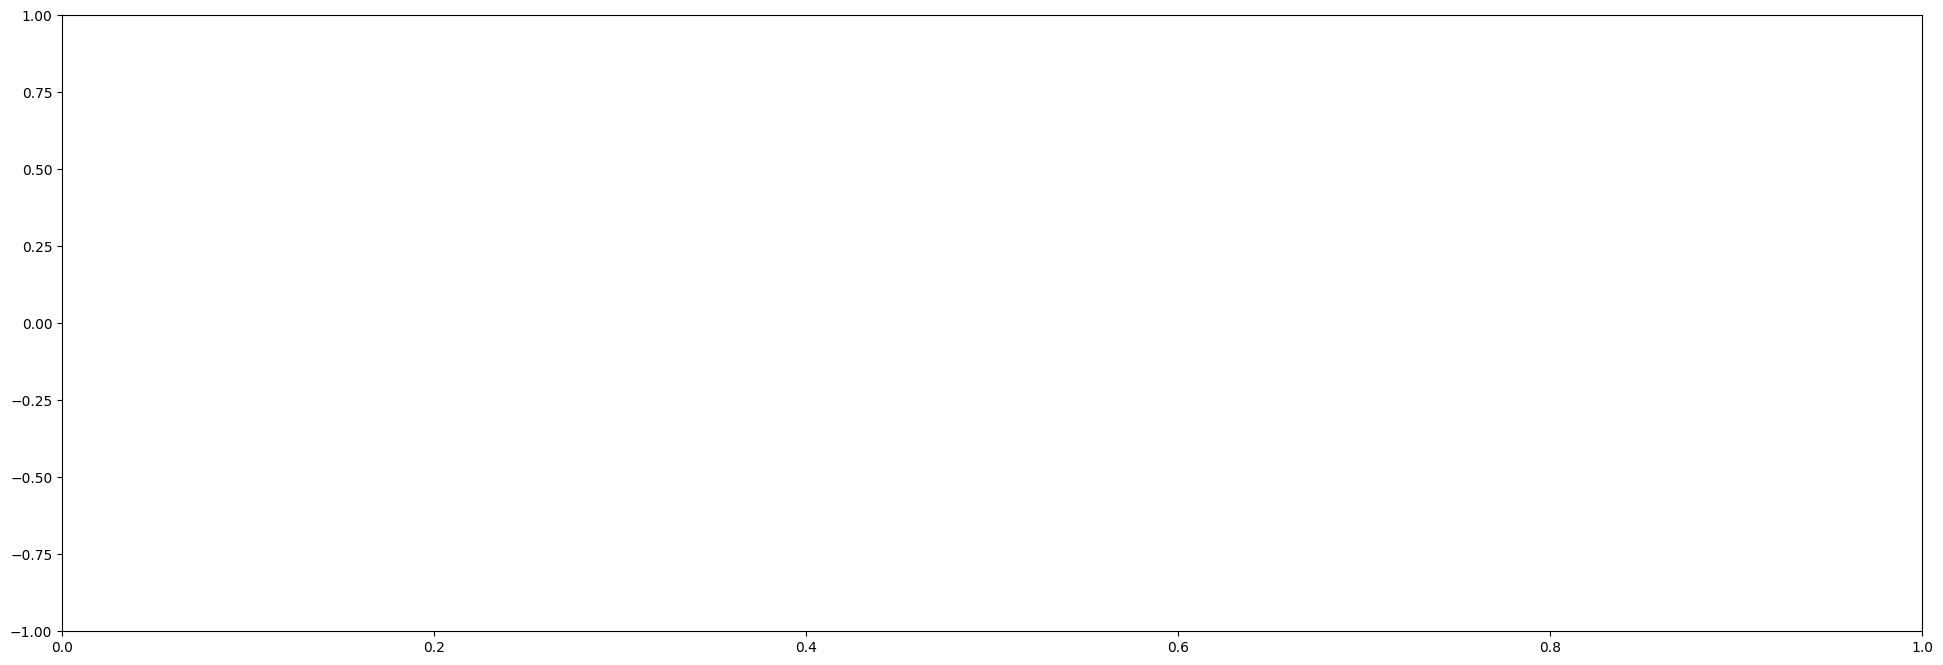

In [30]:
for i in range(len(df['fragment_name'])):
    signal = get_data(root_path, df['fragment_name'][i])
    if signal is not None:
        sig2pic_save1(root_path, df['fragment_name'][i], signal, fig_size, dpi, path_to_save)

In [11]:
img.shape

(2, 400, 1200)

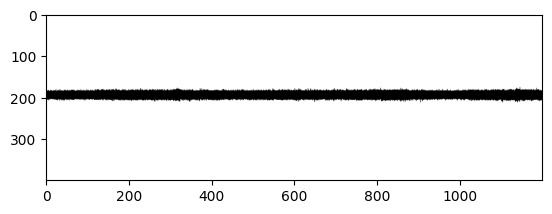

In [12]:
fig, ax = plt.subplots()
ax.imshow(img[0], cmap='gray')


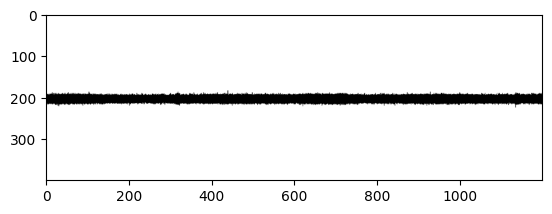

In [13]:
fig, ax = plt.subplots()
ax.imshow(img[1], cmap='gray')

In [14]:
np.sum(img[0] - img[1])

3355111